# Advanced Machine Learning with TensorFlow

In this lecture, we'll begin a relatively long arc in which we will learn to use the TensorFlow package for advanced machine learning, with an emphasis on neural networks.  

## A Few Notes on Google and Ethics

[TensorFlow](https://www.tensorflow.org/) is a Google product. By teaching you TensorFlow, I take a small step toward extending the influence of Google in the field of machine learning and in the STEM community more broadly. By using TensorFlow in and out of this class, you will do the same. It's important that we both go into this with open eyes about some of the ethical questions surrounding Google's recent work in machine learning. I'd like to stress that I am not an expert on ethics in artificial intelligence. There are likely MANY other important ethical concerns about Google's work  (and the work of other giants in tech and artificial intelligence, like Facebook and Amazon) which are not on my radar. 

### 1. Language Models and Dr. Timnit Gebru

In December 2020, Google [fired](https://www.washingtonpost.com/technology/2020/12/03/timnit-gebru-google-fired/) prominent AI ethicist Dr. Timnit Gebru, an Ethiopian-American woman, over a sequence of events surrounding [one of her papers](https://faculty.washington.edu/ebender/papers/Stochastic_Parrots.pdf). In this paper, Gebru and coauthors raise ethical concerns about language models---like the ones that Google uses for predictive text applications. These concerns include:

- The role of these models in homogenizing online culture. 
- The environmental cost of training these (in some cases, comparable to the carbon footprint of a transatlantic flight). 
- The frequent instances of language models learning to reproduce biased or hateful text. 

Dr. Gebru and her collaborators ultimately recommend a more thoughtful, "small", and ethically-informed approach to constructing language models. Naturally, this recommendation would require extensive reorganization of one of Google's major research areas. Possibly because they felt threatened by this and related recommendations, Google managers invented an additional, internal review layer for this paper, even after it had already been accepted at a prominent computer science conference. Dr. Gebru's protest of this made-up red tape was one of the events that led to her firing. 

Dr. Gebru's colleague Margaret Mitchell was [also recently fired](https://www.zdnet.com/article/google-fires-top-ethical-ai-expert-margaret-mitchell/) in the fall-out from this incident. 

### 2. Google Translate Is Sexist

It is well-documented that machine learning algorithms trained on natural text can inherit biases present in those texts. One of the most direct ways in which we can observe such bias is in Google Translate. Some languages, such as Hungarian, do not possess gendered pronouns. When Google Translate attempts to render these pronouns into a gendered language like English, assumptions are made, as pointed out in [this Tweet by Dora Vargha](https://twitter.com/DoraVargha/status/1373211762108076034?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1373211762108076034%7Ctwgr%5E%7Ctwcon%5Es1_&ref_url=https%3A%2F%2Fd-7356743851859968838.ampproject.net%2F2103240330002%2Fframe.html).  Let's demonstrate with the following English sentences. 

> **he** cooks.
> **she** is a political leader.
> **she** is an engineer.
> **he** is a cleaner.
> **he** is beautiful. 
> **she** is strong. 

Translate these into Hungarian and back via Google Translate, and here's what you'll get: 

> **she** cooks.
> **he** is a political leader.
> **he** is an engineer.
> **she** is cleaning.
> **she** is beautiful.
> **he** is strong.

Considering that English *has* a gender neutral pronoun (*they*), this would be an easy item to fix, which Google has thus far declined to do. 

### 3. Historical Racial and Gender Biases

Google Search has a striking history of bias against Black people, especially Black women. This bias was made widely public by UCLA professor Safiya Noble in her book *Algorithms of Oppression*. In one of Dr. Nobel's most famous examples, top results for the phrase "black girls" in 2011 consisted of links to porn sites, which did not hold true of searches for "white girls" or "black men." As late as 2016, an image search for "gorillas" would surface pictures of Black individuals. You can find a brief synopsis of some of Dr. Noble's findings [here](https://time.com/5209144/google-search-engine-algorithm-bias-racism/) (content warning: highly sexually explicit language).  Google has since taken steps to improve these specific examples. 

Keeping these items in mind, let's now begin our study of machine learning via Tensorflow. 

## Tensors

So, uh, what's a tensor? As you may remember from Riemannian geometry, a prerequisite for this class, 

> An $s$-contravariant and $t$-covariant *tensor* $\sigma$ on a vector space $V$ is a multilinear map $\sigma: \left(V^*\right)^s \times V^t \rightarrow \mathbb{R}$, where $V^*$ denotes the space of linear functions on $V$...  

<br> <br>

Just kidding! A tensor is pretty much just a Numpy array. 

<figure class="image" style="width:40%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/_images/tensor.jpeg" alt="">
  <figcaption><i></i></figcaption>
</figure>

Here's another one in case that one didn't sink in: 

<figure class="image" style="width:40%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16B/master/_images/tensor-2.jpeg" alt="">
  <figcaption><i></i></figcaption>
</figure>

Most of the time, we'll work with 2-dimensional tensors (matrices), with the occasional 3-dimensional tensor thrown in for spice. 

## Structure of Neural Networks

Before we start working with TensorFlow, I'd like to build up our understanding of what a neural network actually does to data. We'll see that neural networks are built up of very simple mathematical transformations, which are then stacked on top of each other to produce complex models. 

Suppose I have a data point $x$, with 5 features (columns): 

In [1]:
import numpy as np
x = np.random.rand(5)
x

array([0.98099448, 0.78543795, 0.92410204, 0.9379655 , 0.29385594])

A single *unit* of a neural network has two stages: 

1. The unit takes the entries of $x$, multiplies them by some *weights*, and adds them together, forming the linear combination $y = \sum_i w_i x_i$. This number $y$ is often called the *activation*. 
2. Second, the unit hits $y$ with a non-linear function, producing a new output $z$: $z = g(y)$. 

A common nonlinear function is the sigmoid (same function as used in logistic regression): 

In [2]:
from matplotlib import pyplot as plt
sigmoid = lambda x: 1 / (1 + np.exp(-x))
X = np.linspace(-10, 10)
plt.plot(X, sigmoid(X))

So, given a weight vector $w$, we can easily compute the layer output  for $x$, remembering that `w @ x` will calculate the inner product for us. 

In [3]:
w = np.random.rand(5)
z = sigmoid(w @ x)
z

0.7548699897807329

In practice, we perform this computation using many data points and many units simultaneously. In this case, we can represent the data points as an $m \times n$ matrix $\mathbf{X}$, where $m$ is the number of data points and $n$ is the number of columns. We can represent the matrix of weights as an $p \times n$ matrix $\mathbf{W}$, where $p$ is the number of units in the layer. We can then compute all the activations simultaneously by computing the matrix product $\mathbf{Y} = \mathbf{W} \mathbf{X}^T$. 

Here's a nice picture from the [website of Jeremy Jordan](https://www.jeremyjordan.me/intro-to-neural-networks/) to visualize what's going on. In this diagram, `a` is the activation (what I've been calling $y$). 

![](https://www.jeremyjordan.me/content/images/2018/01/Screen-Shot-2017-11-07-at-12.53.07-PM.png)

We can then hit $\mathbf{Y}$ with the sigmoid function (entrywise) to form the output $\mathbf{Z}$. 

In [4]:
m = 100
n = 5
p = 10
X = np.random.rand(m, n)
W = 1/p * np.random.rand(p, n)

new_X = sigmoid(W @ X.T)

Here's the thing: we now have a *new* matrix, that I'll call $\mathbf{X}_1$, of size $p \times m$. We can now plug that into a NEW layer, getting a new matrix $\mathbf{X}_2$. We can plug THAT into a new layer, etc. By composing all these operations, we get a single, multistage function. **This is a deep neural network.** At the end of the pipeline, we should make sure we have an output that corresponds to the task we want to perform. For example, if we want to do binary classification (classification between two categories), we our weights to look something like this: 

In [5]:
W = 1/2 * np.random.rand(2, m)
output = sigmoid(W @ new_X.T)
output.shape

(2, 10)

The dimension of size 2 holds numbers describing the model's confidence in each of the two categories. At the moment, of course, we haven't done anything like fitting our model to data, so these predictions aren't meaningful (yet).

Note that, while we don't have any control over the data $\mathbf{X}$, we are free to choose the weights $\mathbf{W}$ however we please. Traiing a neural network corresponds to the task of choosing these weights in such a way as to appropriately match the data. 

In summary, at the core of neural networks are the operations of (a) matrix multiplication and (b) simple, nonlinear functions. These are stacked on top of each other (composed) to produce sophisticated models. Naturally, we are not going to do all our bookkeeping of weights and dimensions and whatnot by hand. Managing this bookkeeping is precisely what TensorFlow is for. 

## TensorFlow Basics

In [6]:
import tensorflow as tf
import numpy as np

We can create a simple, "constant" tensor using `tf.constant`: 

In [7]:
s = tf.constant([1, 2, 3])
s

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

As you can see from the output, this object has a `shape`, a `dtype`, and even an internal `numpy` representation -- it really is a lot like a `numpy` array! Like `numpy` arrays, we can do various mathematical operations: 

In [8]:
2*s

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 4, 6], dtype=int32)>

In [9]:
t = tf.constant([3, 2, 1])
s*t

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 4, 3], dtype=int32)>

There *is* a reason that we use `tf.Tensor` rather than Numpy array objects. One of the primary reasons is that the tensor data type is set up to support *automatic differentiation*, which is important when it comes time to train our models. That said, it's sometimes useful to convert back to literal Numpy arrays, which can usually be done like this: 

In [10]:
s.numpy()

array([1, 2, 3], dtype=int32)

Really, they could have called the whole thing ArrayFlow or RectanglesOfNumbersFlow, but those don't really say "I am a very smart person" in quite the same way. 

### Dtypes

Because computation on 64-bit floating point numbers can be quite expensive at scale, most operations in TensorFlow prefer that you supply floating point numbers with data type `float32`. For example: 

In [11]:
tf.constant([1.2, 3.3, 5.6], dtype = np.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.2, 3.3, 5.6], dtype=float32)>

Supplying `float64` data types will usually lead to annoying warning messages, and possibly slower performance. 

While it's good to know what tensors are and how they work, we usually won't need to construct them explicitly. Rather, we'll be able to feed Numpy arrays to our models, which will handle all the tensor operations internally. 

## Layers

*Layers* are the building blocks of models. You can think of a layer as a function that takes in one tensor and spits out another tensor, possibly of a different shape. Many layers have requirements on the kinds of tensors they admit; for example, they might only work on 2d tensors.

In this course, we'll always work with layers via the high-level Keras API, which allows us to easily create and combine layers. 

In [12]:
from tensorflow.keras import layers

In [13]:
data = np.random.rand(10, 3)
print(data)

[[0.91675233 0.80400205 0.57491347]
 [0.22203822 0.73285059 0.27315122]
 [0.7980964  0.07866318 0.28885657]
 [0.57509534 0.90130819 0.94063999]
 [0.50468387 0.44000711 0.40918258]
 [0.97264068 0.89078885 0.44134867]
 [0.65042844 0.62029511 0.31041927]
 [0.19129704 0.59615542 0.15181679]
 [0.76083781 0.61800561 0.80376453]
 [0.71669399 0.32181498 0.47849256]]


In [14]:
data = tf.constant(data, dtype=np.float32)

Now we can create a layer. Note that we first have to *make* the layer before we *call* the layer on any data. The `Dense` layer is the simplest and among the most generally useful kinds of layers, and corresponds fairly directly to the computations that we described "by hand" above. 

In [15]:
first_layer = layers.Dense(units = 2)
first_layer(data)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[-0.05159355, -0.5323487 ],
       [-0.06075069, -0.25465587],
       [ 0.04440692, -0.37592724],
       [-0.35148603,  0.05943757],
       [-0.08316082, -0.19816832],
       [ 0.04675781, -0.7534586 ],
       [ 0.02366694, -0.500354  ],
       [-0.00513858, -0.28668076],
       [-0.23807055, -0.08795483],
       [-0.07491072, -0.23807077]], dtype=float32)>

The `units` argument controls the shape of the output. The `Dense` layer interprets an `m` $\times$ `n` tensor as a set of data points with `m` rows and `n` columns (or features). It outputs a new tensor with `m` rows and `units` columns. So, you can think of `units` as controlling the number of *hidden features* learned by this layer. 

What's the deal with the actual outputs? Well, as we saw above, this layer has parameters (*weights*) which control how these numbers are calculated. Because we haven't done any model training, these weights are pretty much random, so the output is random as well. We'll look at training the model in the next section. 

## Models

A model consists of: 

- A sequence of layers. The final layer is an *output* layer, and plays a major role in determining what "kind" of model we have (e.g. regression vs. classification). 
- Specs for how the model should be fit to data. The most important choice to make here is the *loss function*, which governs how, mathematically, the model will be judged on its performance.

Let's download some real data, create a model, and evaluate its performance. 

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# #BestData
url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)

# only use these columns
df = penguins[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)",  "Species"]]
df = df.dropna()

# categorically encode the "Species" column
le = LabelEncoder()
y = le.fit_transform(df["Species"])

# predictor data
X = df[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"]]

# convert to numpy array
X = np.array(X, dtype = np.float32)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [17]:
X_train[:5] # first five rows of predictor data

array([[ 50.2,  18.7, 198. ],
       [ 55.9,  17. , 228. ],
       [ 43.2,  16.6, 187. ],
       [ 40.9,  18.9, 184. ],
       [ 48.7,  14.1, 210. ]], dtype=float32)

In [18]:
y_train[:5] # first five rows of target data

array([1, 2, 1, 0, 2])

The simplest way to make a model is by using the `tf.keras.models.Sequential` API, which allows you to construct a model by simply passing a list of layers. Let's do two "hidden" layers of 500 units each, and then an output layer of 3 units (corresponding to 3 penguin species). If you've used the [multilayer perceptron algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from `scikit-learn` before, the model below is essentially a multilayer perceptron with parameter `hidden_layer_sizes = (500, 500)`. 

Specifying the `input_shape` in the first layer is not actually necessary unless you want to see the `summary` below. Otherwise, the shape will be inferred the first time you fit the model. 

In [19]:
model = tf.keras.models.Sequential([
    layers.Dense(500, input_shape = (3,), activation='relu'),
    layers.Dense(500, activation='relu'),
    layers.Dense(3)
])

This `input_shape` specifies that each data point has three features. Note that `(3,)` is a tuple with one element; `(3)` wouldn't work here because Python interprets that as just the number `3`.  

The reason we've chosen the final layer to output 3 numbers is that there are 3 species in the data. 

The `model.summary()` is a nice way to get an overview of what's been baked into the model. 

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               2000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1503      
Total params: 254,003
Trainable params: 254,003
Non-trainable params: 0
_________________________________________________________________


Wow -- 250K parameters in this model! Large numbers of parameters allow your model to learn more complex relationships in your data, but also take longer to train and can lead to overfitting. Checking your model summary is usually a good idea, as it can help you get a feeling for the training time required for your model. 

Let's make some "predictions":

In [21]:
model(X_train[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[  3.0709813,   8.919669 , -18.5457   ],
       [  3.4788127,  10.365278 , -21.318262 ],
       [  2.6512136,   8.626654 , -17.725702 ],
       [  2.478286 ,   8.534117 , -17.602919 ],
       [  3.0841246,   9.682065 , -19.754969 ]], dtype=float32)>

These are predictions for the first 5 rows of the data set. Each row is a specific penguin, and each column is one of the three species. The number in the column is related to the model's guess about the species. To convert these into probabilities, we use the `Softmax` layer: 

In [22]:
softmax = tf.keras.layers.Softmax()
softmax(model(X_train[:5]))

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[2.8753879e-03, 9.9712461e-01, 1.1767676e-12],
       [1.0204755e-03, 9.9897951e-01, 1.7360804e-14],
       [2.5339469e-03, 9.9746609e-01, 3.5827404e-12],
       [2.3386711e-03, 9.9766135e-01, 4.4443975e-12],
       [1.3613170e-03, 9.9863869e-01, 1.6408417e-13]], dtype=float32)>

The model hasn't been trained yet, so these "predictions" don't really mean anything. 

### Model Training

Training has two stages. First we *compile* the model, by specifying the loss function and optimization algorithm. Then, we perform the actual training. The choice of loss function is highly dependent on your problem domain. For classification problems, categorical cross-entropy is a good one.  Finally, the `metrics` argument is helpful for controlling which model performance measures are shown when training or evaluating the model. 

In [23]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = "adam",
              loss = loss_fn,
              metrics = ["accuracy"])

Finally ready for training! 

In [24]:
history = model.fit(X_train, y_train, epochs = 20, verbose=1)

Epoch 1/20
8/8 [==============================] - 0s 3ms/step - loss: 15.3548 - accuracy: 0.3414
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 10.0421 - accuracy: 0.3397
Epoch 3/20
8/8 [==============================] - 0s 3ms/step - loss: 3.3719 - accuracy: 0.4255
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 2.9070 - accuracy: 0.3813
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 2.1619 - accuracy: 0.3834
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 0.9913 - accuracy: 0.4638
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 0.6670 - accuracy: 0.7175
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 0.4460 - accuracy: 0.8686
Epoch 9/20
8/8 [==============================] - 0s 5ms/step - loss: 0.3422 - accuracy: 0.9700
Epoch 10/20
8/8 [==============================] - 0s 5ms/step - loss: 0.3486 - accuracy: 0.9206
Epoch 11/20
8/8 [====================

It's handy to save the model output, as this can then be used to plot the progress of the training over time: 

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'training accuracy')]

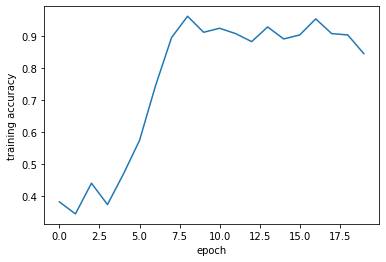

In [25]:
plt.plot(history.history["accuracy"])
plt.gca().set(xlabel = "epoch", ylabel = "training accuracy")

Now we can evaluate the model on our test data: 

In [26]:
model.evaluate(X_test, y_test, verbose = 2)

4/4 - 0s - loss: 0.2142 - accuracy: 0.9417


[0.21423479914665222, 0.9417475461959839]

Our model is able to correctly predict the species of a penguin based on its culmen length, culmen depth, and flipper length around 95% of the time. Not bad! Further training (by choosing more `epochs` in `model.fit` could potentially improve this further---or lead to overfitting. 

### Prediction Probabilities

A minor annoyance is that, even after training, our model still doesn't have very interpretable outputs: 

In [27]:
model(X_train[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.6942892, -2.6168573, -3.5932558],
       [-5.6353717, -4.760679 , -1.2103517],
       [-2.390355 , -4.438276 , -2.634065 ],
       [-0.5668623, -4.493678 , -4.1826735],
       [-4.853306 , -5.8647766, -0.0745165]], dtype=float32)>

Having trained our model, we can create a new, interpretable version by adding a Softmax layer. 

In [28]:
prob_model = tf.keras.models.Sequential([
    model, 
    layers.Softmax()
])

In [29]:
prob_model(X_train[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.19827735, 0.58236575, 0.21935694],
       [0.01150581, 0.02759253, 0.9609017 ],
       [0.5228163 , 0.06744479, 0.409739  ],
       [0.9554736 , 0.01882887, 0.02569756],
       [0.0083109 , 0.00302254, 0.98866653]], dtype=float32)>

Each row now reflects the model's level of confidence that the given penguin is of the given species, which is much more interpretable. 

(*In case you're wondering, we don't include the Softmax layer in the model before we train it for numerical reasons*). 

Ok, but what if we actually want to get the predicted classes for each data point? The `argmax` method is good for this: it gives the index along the specified dimension in which an array has largest value. 

In [30]:
predictions = prob_model.predict(X_test).argmax(axis = 1)
predictions

array([0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2,
       0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1,
       0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2])

In [31]:
[le.classes_[predictions[i]] for i in range(5)]

['Adelie Penguin (Pygoscelis adeliae)',
 'Gentoo penguin (Pygoscelis papua)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeliae)',
 'Adelie Penguin (Pygoscelis adeliae)']

We have now shown all the components for a complete model pipelinem enabling species prediction on unseen data. 

## What's next? 

We've learned about tensors, layers, and models, and we've used a simple model to make predictions on a pretty small data set. In coming lectures, we'll ask questions like: 

- How can I represent text or images as tensors? 
- How can I perform classification, regression, or clustering tasks? 
- How can I interpret what my model is doing? 
- How can I speed up my model training? 